In [1]:
# Todas las librerias que seran utilizadas
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from numpy import *
from random import *
import pandas as pd 

In [2]:
# Se definen las constantes que se usan para la ecuación de Plank
k = 1.380649 * 10**(-23)
c = 299792458 
h = 6.62607015 * 10**(-34)
a = h*c/k

In [3]:
# Se define la ecuación de Plank
def E(y,t):
    E = (8*pi*a*k/(y**5))/(e**(a/(y*t))-1)
    return(E)

In [4]:
Datos = [] # En esta lista se guardaran los datos de la medicion
Archivo = pd.read_csv('Datos_Finales.csv', header=None, skiprows=1) # Se abre el archivo donde se tienen los datos de la "medición"
for i in range(len(Archivo[1])): # Se guardaran los datos de la medicion en la lista
    Datos.append(Archivo[1][i])

In [5]:
MF = 0 # En este variable se guardara la longitud de onda mas comun captada en la medición
D = arange(10**(-8), 2*10**(-6), 10**(-8)) # Se da un rango un rango de longitudes de onda para analizar los datos dados en la medición (cubre cada 10 nanometro hasta 2 micrometros)
C = [] # En esta lista se colocaran la cantidad de "fotones" con una sierta longitud de onda
Datos.append(1) # Para que no marque errores se agrega este valor
for i in D: # Esto se hara para cada valor de la lista de longitudes de onda
    j = 0 # Esta variable corresponde con los "fotones" medidos
    for l in Datos: # Esto se hara para cada valor de la lista de las mediciones
        if l <= i : # Si el valor de la medición es menor o igual que el de la longitud de onda se hara lo siguiente
            j = j + 1 # Se le suma 1 a los fotones medidos, lo que representa que se midio un "foton" con este valor
            Datos.remove(l) # Se elimina de la lista de mediciones para no alterar los siguientes analicis
    C.append(j) # Se agraga el valor de los "fotones" medidos a la lista
MF = D[C.index(max(C))] # Se agrega el valor de la longitud de onda cuyo indice corresponda al de la cantidad de "fotones" mas medido, esto representa a que es la longitud de onda que mas se midio, por lo tanto esta cerca del rango que mas se irradio

La temperatura de esta estrella se encuentra entre 2800 y 2883.58 grados Kelvin


<ipython-input-3-7317a2812e6a>:3: RuntimeWarning: overflow encountered in double_scalars
  E = (8*pi*a*k/(y**5))/(e**(a/(y*t))-1)


Text(0, 0.5, 'Poder Emisivo Espectral $(kW/m^3)$')

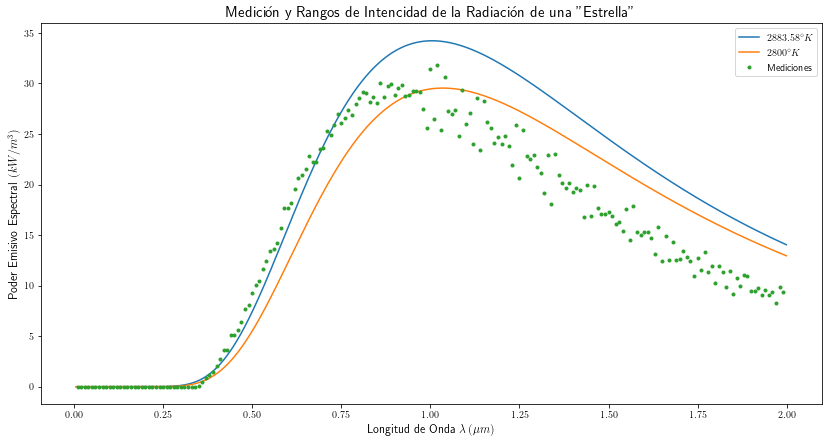

In [6]:
T = 0.002898/MF # Con la longitud de onda que se midio mas, se calcula una temperatura de prueba
T1 = 0.002898/(MF-1.5*10**(-8)) # Con la longitud de onda que se midio mas, se calcula una temperatura de rango minimo
T2 = 0.002898/(MF+1.5*10**(-8)) # Con la longitud de onda que se midio mas, se calcula una temperatura de rango maximo
b = 1 # Esta variable sera una constante de conversión para mostrar en la grafica
Ic = [] # Aquí se colocan los valores de poder emisivo espectral para los valores medidos
F = arange(6*10**(-9), 2*10**(-6), 10**(-9)) # Se da un rango un rango de longitudes de onda para calcular la curva de poder de emision espectral con las temperaturas ya dadas (cubre cada nanometro hasta 2 micrometros)
I = [] # Se haran las listas donde se colocara cada valor de poder de emision espectral para las 3 temperaturas que se calcularon
I1 = [] 
I2 = []
for i in F: # Se calcula los poderes emisivo espectral por cada valor de longitud de onda y las temperaturas correspondientes
    I.append(E(i,T)/1000) # Se divide entre 1000 para converit W/m^3 a kW/m^3
    I1.append(E(i,T1)/1000)
    I2.append(E(i,T2)/1000)
t1 = '$%g ^{\circ}K$' %T1 # Se escribe esta temperatura en forma  latex para grados kelvin
t2 = '$%g ^{\circ}K$' %T2 # Se escribe esta temperatura en forma  latex para grados kelvin
print("La temperatura de esta estrella se encuentra entre %g y %g grados Kelvin" %(T2,T1)) # Se escibe los rangos de temperatura calculado
b = max(I)/max(C) # Se calcula la constante de conversion que de la cantidad de "fotones" medidos lo transforma al poder emsivo espectral
for i in C: # Por cada valor de de "fotones" medidos se transforma en poder emsivo espectral
    Ic.append(i*b)
D = arange(10**(-2), 2, 10**(-2)) # Se hace una nueva lista para transformar metros a micrometros
F = arange(6*10**(-3), 2, 10**(-3)) # Se hace una nueva lista para transformar metros a micrometros
plt.figure(figsize=(14,7)) # La figura tendra un tamaño de 14x7 pulgadas
plt.plot(F, I1, label = t1) # Se grafica la curva de temperatura 1 y se muestra su temperatura en una leyenda en forma latex
plt.plot(F, I2, label = t2) # Se grafica la curva de temperatura 2 y se muestra su temperatura en una leyenda en forma latex
plt.plot(D, Ic, ".", label = "Mediciones") # Se Muestran los valores de las mediciones
plt.legend(loc=1) # Se colocan las leyendas en la posición superior derecha
plt.title("Medición y Rangos de Intencidad de la Radiación de una  \"Estrella\" ", fontsize=15) # Se da el titulo de la grafica
plt.xlabel("Longitud de Onda $\lambda \, (\mu m)$",fontsize=12) # Se pone en eje x el elemento que muestra y su unidad con latex
plt.ylabel("Poder Emisivo Espectral $(kW/m^3)$",fontsize=12) # Se pone en eje y el elemento que muestra y su unidad con latex